<a href="https://colab.research.google.com/github/rezendervp/chemical-engineering/blob/main/Condu%C3%A7%C3%A3o_1D_BDF2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

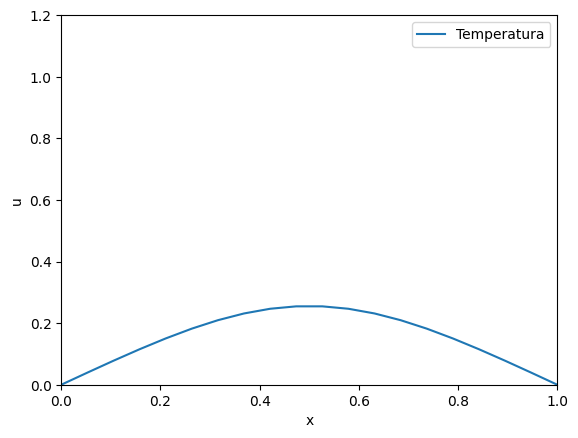

In [ ]:
"""Condução unidimensinal transiente com fonte

   =================================================================================

   Formulação IMPLÍCITA no tempo (theta = 1)
   Discretização no tempo por Euler de 2a Ordem
   Neste caso, há montagem de matriz, as equações são resolvidas  a cada
   passo de tempo

   Discretização no espaço CDS  (2a ordem)

   =================================================================================

   Introdução à Fluidodinâmica Computacional

   Prof. Dr. Ricardo V. P. Rezende  ©2024

   =================================================================================

   OBS.: a solução é rápida, mas a montagem do vídeo é mais demorada,
   verifique o tmepo  de computação mostrado - ele considera somente a
   a montagem e inversão da matriz
"""


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time


# Parâmetros do problema
L = 1.0        # Comprimento do domínio
T = 10        # Tempo total
alpha = 0.01   # Difusividade térmica
Nx = 20        # Número de pontos no espaço
Nt = 100       # Número de passos de tempo
dx = L / (Nx - 1)  # Espaçamento espacial
dt = T / Nt    # Passo de tempo

# Marca o tempo de início
start_time = time.time()

# Condição inicial
u0 = np.zeros(Nx)
u0[int(0.4 * Nx):int(0.6 * Nx)] = 1  # Pico inicial

# Parâmetro r
r = alpha * dt / dx**2

# Construindo a matriz A para BDF2
A = np.zeros((Nx, Nx))
np.fill_diagonal(A, 3 + 2 * r)
np.fill_diagonal(A[1:], -r)
np.fill_diagonal(A[:, 1:], -r)

# Condições de contorno (Dirichlet)
A[0, 0] = 1
A[0, 1] = 0
A[-1, -1] = 1
A[-1, -2] = 0

# Solução no tempo
u = u0.copy()
u_prev = u0.copy()  # Armazena a solução no passo de tempo anterior
u_all = [u0.copy()]  # Para armazenar todas as soluções ao longo do tempo

# Primeiro passo de tempo usando Euler Implícito para obter u^1
B = np.zeros((Nx, Nx))
np.fill_diagonal(B, 1 + 2 * r)
np.fill_diagonal(B[1:], -r)
np.fill_diagonal(B[:, 1:], -r)
B[0, 0] = 1
B[0, 1] = 0
B[-1, -1] = 1
B[-1, -2] = 0

u = np.linalg.solve(B, u0)
u_all.append(u.copy())

for n in range(2, Nt + 1):
    b = 4 * u - u_prev
    b[0] = 0  # Condição de contorno
    b[-1] = 0  # Condição de contorno
    u_prev = u.copy()
    u = np.linalg.solve(A, b)
    u_all.append(u.copy())


# Marca o tempo de fim
end_time = time.time()

# Imprime o tempo de execução
print("Tempo de execução: {:.2f} segundos".format(end_time - start_time))


# Configuração da animação
fig, ax = plt.subplots()
x = np.linspace(0, L, Nx)
line, = ax.plot(x, u0, label='Temperatura')
ax.set_xlim(0, L)
ax.set_ylim(0, 1.2)
ax.set_xlabel('x')
ax.set_ylabel('u')
ax.legend()

def animate(i):
    line.set_ydata(u_all[i])
    return line,

ani = animation.FuncAnimation(fig, animate, frames=Nt+1, interval=50, blit=True)

# Salvando a animação em um arquivo MP4
ani.save('conducao_calor_bdf2.mp4', writer='ffmpeg')

# Exibindo o vídeo no Google Colab
from IPython.display import Video
Video("conducao_calor_bdf2.mp4")
